### SQLITE

In [1]:
import sqlite3

# Connect to the database
# conn = sqlite3.connect('example.db')
conn = sqlite3.connect(':memory:')

# create cursor 
cursor = conn.cursor()

Database Creation

In [2]:
# Create the EMPLOYEE table
create_table = ''' 
CREATE TABLE IF NOT EXISTS EMPLOYEE(
    FIRST_NAME CHAR(20) NOT NULL,
    LAST_NAME CHAR(20),
    AGE INT NOT NULL,
    SEX CHAR(1),
    INCOME FLOAT
)
'''
cursor.execute(create_table)
conn.commit()

Insertion

In [3]:
# Insert one record
insert_one = '''
INSERT INTO EMPLOYEE (FIRST_NAME, LAST_NAME, AGE, SEX, INCOME)
VALUES (?, ?, ?, ?, ?)
'''
cursor.execute(insert_one, ('John', 'Doe', 30, 'M', 50000.00))
conn.commit()


# Insert multiple records at once
employees = [
    ('Alice', 'Smith', 28, 'F', 55000.00),
    ('Bob', 'Brown', 35, 'M', 60000.00),
    ('Carol', 'Taylor', 29, 'F', 62000.00)
]
for employee in employees:
    cursor.execute(insert_one, employee)
conn.commit()


# Insert multiple records using executemany
employees = [
    ('David', 'Wilson', 40, 'M', 70000.00),
    ('Eve', 'Davis', 45, 'F', 80000.00),
    ('Frank', 'Thomas', 50, 'M', 90000.00)
]
cursor.executemany(insert_one, employees)
conn.commit()


# Insert a record with a NULL value
cursor.execute(insert_one, ('George', None, 32, 'M', 45000.00))
conn.commit()


Fetching

In [4]:
# Fetch one record
cursor.execute('SELECT * FROM EMPLOYEE WHERE FIRST_NAME = ?', ('John',))
record = cursor.fetchone()
print(record)

('John', 'Doe', 30, 'M', 50000.0)


In [5]:
# Fetch all records
cursor.execute('SELECT * FROM EMPLOYEE')
records = cursor.fetchall()
for record in records:
    print(record)

('John', 'Doe', 30, 'M', 50000.0)
('Alice', 'Smith', 28, 'F', 55000.0)
('Bob', 'Brown', 35, 'M', 60000.0)
('Carol', 'Taylor', 29, 'F', 62000.0)
('David', 'Wilson', 40, 'M', 70000.0)
('Eve', 'Davis', 45, 'F', 80000.0)
('Frank', 'Thomas', 50, 'M', 90000.0)
('George', None, 32, 'M', 45000.0)


In [6]:
# Fetch many records
cursor.execute('SELECT * FROM EMPLOYEE')
records = cursor.fetchmany(3)  # Fetch 3 records
for record in records:
    print(record)

('John', 'Doe', 30, 'M', 50000.0)
('Alice', 'Smith', 28, 'F', 55000.0)
('Bob', 'Brown', 35, 'M', 60000.0)


In [7]:
cursor.execute("SELECT * from EMPLOYEE") # Cursor is a generator 

# this will fetch the first record
record = cursor.fetchone()
print(record)

# this will fetch the from the second record. 
records = cursor.fetchmany(2)  # Fetch 2 records
for record in records:
    print(record)

('John', 'Doe', 30, 'M', 50000.0)
('Alice', 'Smith', 28, 'F', 55000.0)
('Bob', 'Brown', 35, 'M', 60000.0)


Updating

In [8]:
update_query = '''
UPDATE EMPLOYEE
SET INCOME = ?
WHERE FIRST_NAME = ?
'''
cursor.execute(update_query, (55000.00, 'John'))
conn.commit()

Delete

In [9]:
# Delete a row where the FIRST_NAME is 'John'
cursor.execute('DELETE FROM EMPLOYEE WHERE FIRST_NAME = ?', ('John',))

# Commit the changes
conn.commit()

# Verify the deletion
cursor.execute('SELECT * FROM EMPLOYEE')
records = cursor.fetchall()
for record in records:
    print(record)


('Alice', 'Smith', 28, 'F', 55000.0)
('Bob', 'Brown', 35, 'M', 60000.0)
('Carol', 'Taylor', 29, 'F', 62000.0)
('David', 'Wilson', 40, 'M', 70000.0)
('Eve', 'Davis', 45, 'F', 80000.0)
('Frank', 'Thomas', 50, 'M', 90000.0)
('George', None, 32, 'M', 45000.0)


Rename

In [10]:
# rename column sex to gender. 
cursor.execute('''ALTER TABLE EMPLOYEE RENAME COLUMN SEX TO GENDER''')
conn.commit()

# Query to get table column information
cursor.execute('PRAGMA table_info(EMPLOYEE)')
columns = cursor.fetchall()
print(columns)


# rename the whole table 
cursor.execute("""ALTER TABLE EMPLOYEE RENAME TO Employee_UPDATED""")
conn.commit()


[(0, 'FIRST_NAME', 'CHAR(20)', 1, None, 0), (1, 'LAST_NAME', 'CHAR(20)', 0, None, 0), (2, 'AGE', 'INT', 1, None, 0), (3, 'GENDER', 'CHAR(1)', 0, None, 0), (4, 'INCOME', 'FLOAT', 0, None, 0)]


Drop

In [11]:
# Drop the EMPLOYEE table
cursor.execute('DROP TABLE IF EXISTS EMPLOYEE')

# Commit the changes
conn.commit()

In [12]:
# Close the connection
conn.close()

### Pandas

#### Cross Tabs
- Allows us to create contingency tables, also known as cross-tabulations.

In [13]:
import pandas as pd

# create a sample dataset
df = pd.DataFrame({
    'gender': ['male', 'male', 'female', 'female', 'male', 'female', 'male', 'female'],
    'education_level': ['high school', 'college', 'college', 'graduate', 'high school', 'graduate', 'college', 'graduate'],
    'score': [75, 82, 88, 95, 69, 92, 78, 85]
})
df

,gender,education_level,score
0,male,high school,75
1,male,college,82
2,female,college,88
3,female,graduate,95
4,male,high school,69
5,female,graduate,92
6,male,college,78
7,female,graduate,85


In [14]:
# create a crosstab table of gender and education level 
# counting the number of occurrences of each combination of values
ct = pd.crosstab(df['gender'], df['education_level'])
print(ct)

education_level  college  graduate  high school
gender                                         
female                 1         3            0
male                   2         0            2


In [15]:
# Aggregating Values in Crosstab Table
ct_mean = pd.crosstab(df['gender'], df['education_level'], 
                    values=df['score'], aggfunc='mean')
print(ct_mean)

education_level  college   graduate  high school
gender                                          
female              88.0  90.666667          NaN
male                80.0        NaN         72.0


In [16]:
# Adding Row and Column Margins
ct_margins = pd.crosstab(df['gender'], df['education_level'], margins=True) #  If set to True, the function will add a row and a column to the table that show the marginal totals.
ct_margins

education_level,college,graduate,high school,All
gender,,,,
female,1,3,0,4
male,2,0,2,4
All,3,3,2,8


In [17]:
# Normalizing Crosstab Table
ct_normaized = pd.crosstab(df["gender"], df["education_level"],margins=True, normalize=True)
ct_normaized

education_level,college,graduate,high school,All
gender,,,,
female,0.125,0.375,0.00,0.5
male,0.250,0.000,0.25,0.5
All,0.375,0.375,0.25,1.0


<Axes: xlabel='gender'>

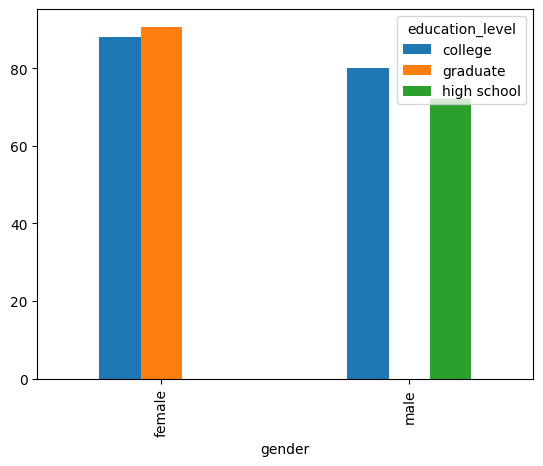

In [18]:
# visualize 
ct_viz = pd.crosstab(df['gender'], df['education_level'], values=df["score"], aggfunc="mean")
ct_viz.plot(kind='bar', stacked=False)


In [19]:
import random 
random.seed(32)
# on sample data 
df = pd.read_excel("lecture5/loan_sample.xlsx")
# lets create a random loan application selected or not selecte field 
df["app_rejection"] = [random.choice([1,0]) for _ in range(df.shape[0]) ]

df.head()

,Profession,Gender,Own_House,Income,Loan_Given,app_date,app_rejection
0,Accountants,F,Y,135000,814041.0,2020-12-27,1
1,Laborers,M,Y,157500,814041.0,2021-01-14,1
2,High skill tech staff,F,Y,140400,180000.0,2020-10-28,1
3,Managers,M,Y,454500,1070982.0,2021-09-19,0
4,Laborers,M,N,157500,817560.0,2021-07-03,1


In [20]:
# Loan application rejection by gender 
pd.crosstab(index=df.Gender, columns=df.app_rejection)

app_rejection,0,1
Gender,,
F,19,32
M,25,24


In [21]:
# Loan application rejection by gender in terms of percentage
pd.crosstab(index=df.Gender, columns=df.app_rejection, normalize="index")

app_rejection,0,1
Gender,,
F,0.372549,0.627451
M,0.510204,0.489796


In [22]:
# Loan application rejection by gender in terms of percentage across columns
pd.crosstab(index=df.Gender, columns=df.app_rejection, normalize="columns")

app_rejection,0,1
Gender,,
F,0.431818,0.571429
M,0.568182,0.428571


In [23]:
# Loan application rejection by gender in terms of house owner or not
pd.crosstab(index=df.Gender, columns=[df.app_rejection,df.Own_House])

app_rejection  0       1    
Own_House      N   Y   N   Y
Gender                      
F              6  13   8  24
M              8  17  13  11

In [24]:
# Loan application rejection by gender in terms of house owner or not
pd.crosstab(index=[df.Gender,df.Own_House], columns=[df.app_rejection], margins=True)

app_rejection      0   1  All
Gender Own_House             
F      N           6   8   14
       Y          13  24   37
M      N           8  13   21
       Y          17  11   28
All               44  56  100

In [25]:
# Loan application rejection by gender in terms of house owner or not: Here lets analyze thier income distribution
pd.crosstab(index=[df.Gender,df.Own_House], columns=[df.app_rejection], values=df.Income, aggfunc="mean")

app_rejection                 0              1
Gender Own_House                              
F      N          287250.000000  213750.000000
       Y          246115.384615  215006.250000
M      N          225331.875000  334730.769231
       Y          239823.529412  220090.909091

In [26]:
# Loan application rejection by gender in terms of house owner or not: Here lets analyze thier income distribution
pd.crosstab(index=[df.Gender,df.Own_House], columns=[df.app_rejection], values=df.Income, aggfunc="mean")

app_rejection                 0              1
Gender Own_House                              
F      N          287250.000000  213750.000000
       Y          246115.384615  215006.250000
M      N          225331.875000  334730.769231
       Y          239823.529412  220090.909091

### NumPy

In [129]:
import numpy as np 


array = np.array([
    [11,12,13,14,15],
    [21,22,23,24,25],
    [31,32,33,34,35],
    [41,42,43,44,45],
    [51,52,53,54,55]
                    ])

# basics 
# axis=0 typically refers to columns.
# axis=1 typically refers to rows


print(np.max(array))
print(np.max(array, axis=0))
print(np.max(array, axis=1))

# mean 
print(np.mean(array))

# variance 
print(np.var(array))

# standard Deviation 
print(np.std(array))

# mean along the certain axis 
print(np.mean(array, axis= 0))
print(np.mean(array, axis= 1))


# reshape 
print(array.reshape(1,-1))
print(np.arange(16).reshape(2,8))

# flatten 
# ndarray.flatten(order='C/F')
print(np.arange(6).reshape(2,3).flatten(order="C"))
print(np.arange(6).reshape(2,3).flatten(order="F"))


55
[51 52 53 54 55]
[15 25 35 45 55]
33.0
202.0
14.212670403551895
[31. 32. 33. 34. 35.]
[13. 23. 33. 43. 53.]
[[11 12 13 14 15 21 22 23 24 25 31 32 33 34 35 41 42 43 44 45 51 52 53 54
  55]]
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]
[0 1 2 3 4 5]
[0 3 1 4 2 5]


#### Multidimensional Indexing

In [30]:
array = np.array([
    [12,12,13,14,15],
    [21,22,23,24,25],
    [31,32,33,34,35],
    [41,42,43,44,45],
    [51,52,53,54,55]
                    ])

In [31]:
print(array[:3, 2:])

[[13 14 15]
 [23 24 25]
 [33 34 35]]


In [35]:
print(array[3:,:])

[[41 42 43 44 45]
 [51 52 53 54 55]]


In [36]:
print(array[:,::2])

[[12 13 15]
 [21 23 25]
 [31 33 35]
 [41 43 45]
 [51 53 55]]


#### Get index of values:

In [40]:
# get index of 55
np.where(array == 55)

(array([4]), array([4]))

In [59]:
# how to get index of multuple values if array has same repeted values 
sample_arry = [1,2,3,1]

idxs = []
# get the index of 1
for i , v in np.ndenumerate(sample_arry):
    if v == 1: 
        idxs.append(i)
        
print(idxs)




# How to make this method blazing fast?
from numba import njit 

sample_arry = np.arange(100000000)
sample_arry[0] = sample_arry[-1]

@njit
def get_index(array, item):
    for i , v in np.ndenumerate(array):
        if v == item:
            print(i)
            
get_index(sample_arry,99999999)

[(0,), (3,)]
(0,)
(99999999,)


#### Basic Operations

In [61]:
matrix1 = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])

matrix2 = np.array([[-1, 0, 2],
                    [4, -3, 1],
                    [6, 7, -2]])

# subtract 
print(np.subtract(matrix1,matrix2))

# add 
print(np.add(matrix1,matrix2))

# dot 
print(np.dot(matrix1,matrix2))


# matmul 
print(np.matmul(matrix1,matrix2))


[[ 2  2  1]
 [ 0  8  5]
 [ 1  1 11]]
[[ 0  2  5]
 [ 8  2  7]
 [13 15  7]]
[[25 15 -2]
 [52 27  1]
 [79 39  4]]
[[25 15 -2]
 [52 27  1]
 [79 39  4]]


#### Custom Matrix Multiplier

In [134]:
from typing import List, Union
class Matrix:
    
    def __init__(self, data: Union[list, np.ndarray] ) -> None:
        self.data = np.array(data) 
        self.rows , self.columns = self.data.shape
        
        
    def __mul__(self, matrix : 'Matrix') -> 'Matrix':
        
        if not isinstance(matrix, Matrix):
            raise ValueError("Cannot multiply other data type.")
        
        if self.columns != matrix.rows:
            raise ValueError("Shape mismatch, cannot multuply these matrices.")
        
        # initialize the resultant matrix:
        result = np.zeros((self.rows, matrix.columns))
        
        # perform the matrix multiplication 
        for i in range(self.rows):
            for j in range(matrix.columns):
                for k in range(self.columns):
                    result[i,j] += self.data[i,k] * matrix.data[k,j]
                    
        return Matrix(result)
    
    def __repr__(self) -> str:
        return str(self.data)
    

m1 = Matrix(matrix1)
m2 = Matrix(matrix2)
m3 = Matrix(array)

print(m1 * m2)
print(m1*m3)

[[25. 15. -2.]
 [52. 27.  1.]
 [79. 39.  4.]]


ValueError: Shape mismatch, cannot multuply these matrices.

#### Lambda and Vectorize

In [105]:
a = lambda x : x + 10
a(12)

22

In [107]:
x = lambda a,b,c : a * b * c
x(2,4,5)

40

In [109]:
# lambda to add each number by 100
add_100 = lambda x : x + 100

# Vectorize the lambda 
vectorized = np.vectorize(add_100)


# apply the vectorizer 
vectorized(matrix1)

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

#### Stacking

In [133]:
a1 = np.array([1, 2, 3])
a2 = np.array( [4, 5, 6])
# Horizontal stacking 
print( 
      np.hstack((a1, a2))
      )
# Vertical stacking
print( 
      np.vstack((a1, a2))
      )

# Height stacking 
print( 
      np.dstack((a1, a2))
      )


[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[[[1 4]
  [2 5]
  [3 6]]]
